<a href="https://colab.research.google.com/github/aubricot/computer_vision_with_eol_images/blob/master/play_for_beginners/yolo_demo_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Try computer vision yourself in under 5 mintes!
#### Upload your own image and see what objects a computer vision model can find in it
---
*Last Updated 15 August 2025*   
Computer vision is a field of machine learning where computers are trained to recognize and identify patterns from images. Nowadays, computer vision is so common that many smartphones use it to sort the image gallery into categories like holidays, pets or even recognize friends faces. You can try using the search feature in your phone's image gallery to see what classes of objects your phone knows!

Here, we use a pre-trained "lightweight" model known for its speed that's still rather accurate, YOLOv3 (downloaded from [here](https://github.com/AlexeyAB/darknet)), pre-trained on [Google Open Images v4](https://storage.googleapis.com/openimages/web/visualizer/index.html?set=train&type=detection&c=%2Fm%2F03vt0), a dataset of to detect 600 classes of everyday objects and animals, including bird, butterfly, airplane, bottle, tv and more.

Notes: This notebook runs entirely in Google Colab and doesn't require any software installations or downloads to your local machine. It is best to run this demo on a computer instead of a phone.

## Installs & Imports
---
Run this code block by dragging your mouse over the brackets to the left of line 1 and press the "play" button. It takes about 1-2 minutes to run and you will see some text being output beneath the block. After it is finished, scroll down to **Object Detection**.

In [1]:
# Download helper_funcs folder
!pip3 -q install --upgrade gdown
!gdown 1TtL_NvD4oOXJaiqKfQs_qULuNAZDsF2J
!tar -xzvf helper_funcs.tar.gz -C .

# Install requirements.txt
!pip3 -q install -r requirements.txt

# Set up directory structure & make darknet
from setup import setup_darknet
cwd, basewd = setup_darknet()

# Import libraries
# For importing/exporting files, working with arrays, etc
import glob
import pathlib
import six.moves.urllib as urllib
import sys
import tarfile
import zipfile
import numpy as np
import csv
import time
import pandas as pd
import requests

# For drawing onto and plotting images
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sys.path.append('/content')

# Import defined functions
%cd $basewd
from wrangle_data import image_from_url, imShow, upload

Downloading...
From (original): https://drive.google.com/uc?id=1TtL_NvD4oOXJaiqKfQs_qULuNAZDsF2J
From (redirected): https://drive.google.com/uc?id=1TtL_NvD4oOXJaiqKfQs_qULuNAZDsF2J&confirm=t&uuid=e77f6ceb-6bae-459a-a273-a806f6c2530f
To: /content/helper_funcs.tar.gz
100% 241M/241M [00:02<00:00, 97.3MB/s]
./
./__init__.py
./yolov3-openimages.weights
./requirements.txt
./wrangle_data.py
./setup.py
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 26.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not cu

## Object Detection - Find out what objects YOLO can see in your image
---
You can either **A) Load an image in by URL** or **B) Load an image in from file**.

**A) Load in individual image by URL**   
Read in any image from a URL and see what objects YOLO can find!   
1. To get an image from a url:  
* For images from [CCSearch](https://ccsearch.creativecommons.org/), click the image you want. Next, right click the image and select "open image in new tab."  
* For images from [Google Images](https://images.google.com/), right click the image you want and select "open image in new tab."
2. Copy the url and paste it in the form field of code block below (image_url).
3. Drag your mouse over the brackets in the top left corner of the code block below until you see a play sign. Press play to run the block.
4. Sit and wait while YOLO works.
5. See what cool stuff YOLO found in your image!

/content/drive/MyDrive/train/darknet
 Successfully downloaded image from URL
 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 B

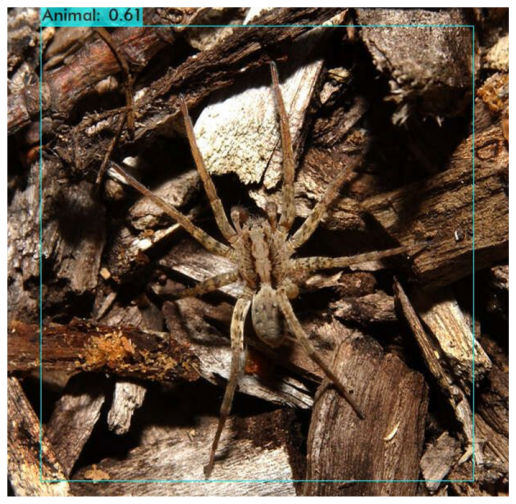

In [2]:
# B) Run inference on your image from URL.
# Enter your filename in the form field on the right.
%cd $cwd

# Type in your image URL
image_url = "https://content.eol.org/data/media/be/3d/76/30.8c3b01f1577c4318624fed843e137a29.jpg" #@param ["https://content.eol.org/data/media/be/3d/76/30.8c3b01f1577c4318624fed843e137a29.jpg"] {allow-input: true}

# Download the image from URL
img_fpath = image_from_url(image_url, cwd)

# Run inference
!./darknet detector test cfg/openimages.data cfg/yolov3-openimages.cfg yolov3-openimages.weights {img_fpath}

# Display detected object(s)
print("\n~\n~\n~\n \033[92m Object detection results:")
imShow('predictions.jpg')

**B) Load in individual image by file**   
Read in any image from file and see what objects YOLO can find!  
To run inference on an image from file:  
1. Enter your image filename in the form field below (image_filename).
2. Drag your mouse over the brackets in the top left corner of the code block below until you see a play sign. Press play to run the block.
3. When you are prompted to upload your image file, click "Choose Files" and select your image file.
4. Sit and wait while YOLO works.
5. See what cool stuff YOLO found in your image!

/content/drive/MyDrive/train/darknet
Using demo image 509.67a3c831deb818de140b79d9d393a666.jpg from EOL (https://content.eol.org/data/media/04/59/24/509.67a3c831deb818de140b79d9d393a666.jpg).
 Successfully downloaded image from URL
/content/drive/MyDrive/train/darknet
 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, 

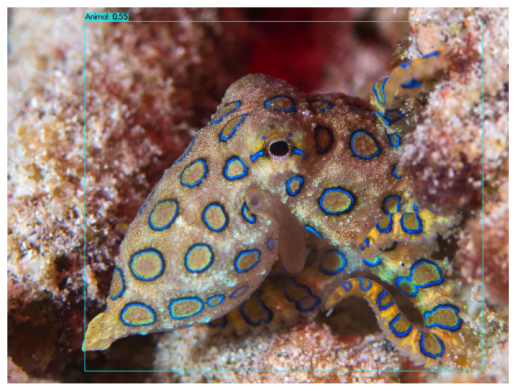

In [3]:
# B) Run inference on your image from file.
%cd $cwd

# Type in image filename (skip if using demo image)
use_demo_img = "yes" # @param ["yes","no"]
if use_demo_img:
    print("Using demo image 509.67a3c831deb818de140b79d9d393a666.jpg from EOL (https://content.eol.org/data/media/04/59/24/509.67a3c831deb818de140b79d9d393a666.jpg).")
    image_filename = "509.67a3c831deb818de140b79d9d393a666.jpg" #@param ["509.67a3c831deb818de140b79d9d393a666.jpg"] {allow-input: true}
    image_url = "https://content.eol.org/data/media/04/59/24/509.67a3c831deb818de140b79d9d393a666.jpg"
    img_fpath = image_from_url(image_url, cwd)

# Upload image to Colab runtime
else:
    print("First, type your image filename in the form field to right. Then, upload the image you want to run inference on by clicking the Choose Files button")
    %cd data/imgs
    upload()

# Run inference
%cd $cwd
img_fpath = 'data/imgs/' + image_filename
!./darknet detector test cfg/openimages.data cfg/yolov3-openimages.cfg yolov3-openimages.weights {img_fpath}

# Display detected object(s)
print("\n~\n~\n~\n \033[92m Object detection results:")
imShow('predictions.jpg')